# I. Algorithm

In [4]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Defining the Euclidean distance function - Will Be Default
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Defining Manhattan_Distance

def manhattan_distance(point1, point2):
    return np.abs(point1[0]-point2[0]) + np.abs(point1[1]-point2[1])

# Accuracy Function for Evaluating Classification Accuracy

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Implement the KNN class
class KNN:
    def __init__(self, k=3, distance_function = euclidean_distance):
        self.k = k  # Number of neighbors
        self.distance = distance_function # Default is using euclidean distance

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute the distance between x and all points in the training data
        distances = [self.distance(x, x_train) for x_train in self.X_train]
        
        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common class label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# II. Application to Data Set

Inverted roller coasters are roller coasters that go upside down at least once. Inversions add a new element of thrill but usually require extra safety harnesses and may be more costly. We will try to apply the kNN algorithm to classify a roller coaster as having inversions or no inversions based on its height and speed.

We will first extract the columns we will use from our data set. We will look at each roller coaster's height in feet, speed in miles per hour, and number of inversions. Then, we create a column called 'Inverted' that is 1 if the roller coaster has at least 1 inversion and -1 if there are 0 inversions. 

In [6]:
coaster_data = pd.read_csv("../coaster_db.csv")

#coaster_subset = coaster_data[['Inversions_clean','height_ft','speed_mph','Gforce_clean']]

coaster_subset = coaster_data[['height_ft','speed_mph','Inversions_clean']]

clean_data = coaster_subset.dropna()

# Creating column for whether coaster has at least one inversion or not

clean_data['Inverted'] = clean_data['Inversions_clean'].apply(lambda x: 1 if x > 0 else 0)

print(f"There are {clean_data.shape[0]} roller coasters we have data for.")
print(f"There are {np.sum(clean_data['Inverted'])} inverted roller coasters.")
print(f"There are {clean_data.shape[0]-np.sum(clean_data['Inverted'])} non-inverted roller coasters.")


There are 156 roller coasters we have data for.
There are 62 inverted roller coasters.
There are 94 non-inverted roller coasters.


/var/folders/xh/x976_5p93059y1sn4ybh8ql40000gn/T/ipykernel_6310/2444863937.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Inverted'] = clean_data['Inversions_clean'].apply(lambda x: 1 if x > 0 else 0)


Next, we'll create a scatter plot to visualize our results. As you can see below, the non-inverted roller coasters are generally close to each other but there aren't distinct clusters.

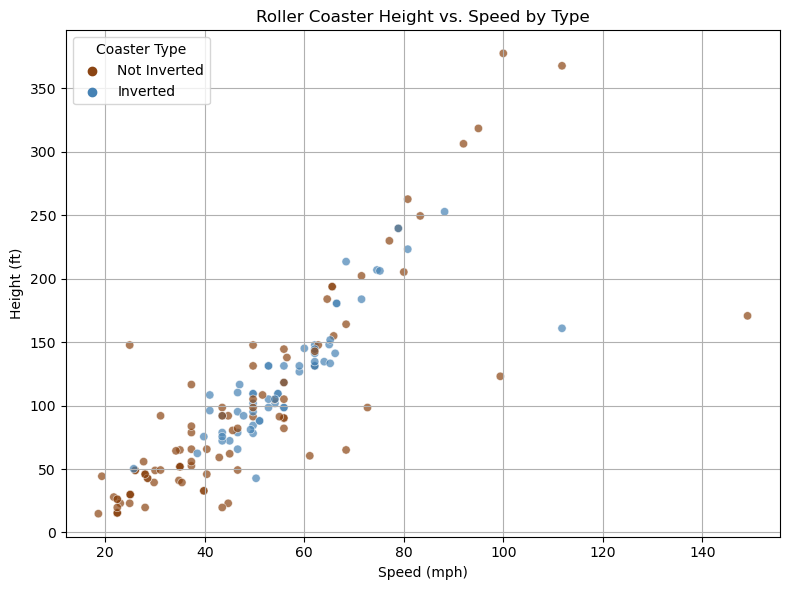

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=clean_data,
    x='speed_mph',
    y='height_ft',
    hue='Inverted',  # Color by the 'Inverted' column
    palette={1: 'steelblue', 0: 'saddlebrown'},  # Custom colors
    alpha=0.7,
    hue_order=[0, 1] 
)

# Manually adjust legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Not Inverted', 'Inverted']  # Custom labels
plt.legend(handles, labels, title='Coaster Type', loc='upper left')

plt.title('Roller Coaster Height vs. Speed by Type')
plt.xlabel('Speed (mph)')  # Correcting labels
plt.ylabel('Height (ft)')
plt.grid(True)
plt.tight_layout()
plt.show()

The mean speed of roller coasters without inversions is 47.47 mph.
The mean speed of roller coasters with inversions is 56.4 mph.


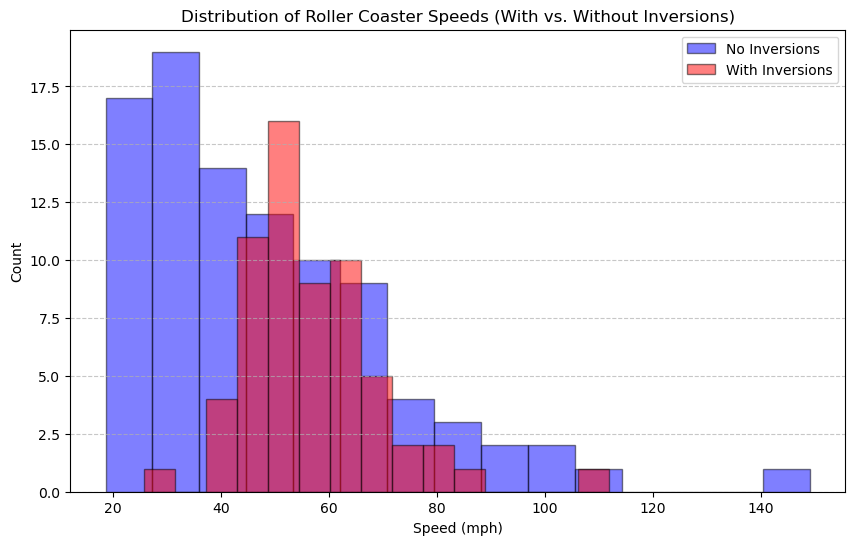

In [9]:
# Splitting the data into two groups
no_inversions = clean_data[clean_data['Inverted'] == 0]
with_inversions = clean_data[clean_data['Inverted'] == 1]

# Plotting the overlaid histograms
plt.figure(figsize=(10, 6))
plt.hist(no_inversions['speed_mph'], bins=15, edgecolor='black', alpha=0.5, label='No Inversions', color='blue')
plt.hist(with_inversions['speed_mph'], bins=15, edgecolor='black', alpha=0.5, label='With Inversions', color='red')

# Labels and title
plt.xlabel('Speed (mph)')
plt.ylabel('Count')
plt.title('Distribution of Roller Coaster Speeds (With vs. Without Inversions)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

print(f"The mean speed of roller coasters without inversions is {round(np.mean(no_inversions['speed_mph']),2)} mph.")
print(f"The mean speed of roller coasters with inversions is {round(np.mean(with_inversions['speed_mph']),2)} mph.")

Looking at these 2 distributions, we can see that the speeds of roller coasters without inversions is very right skewed with a couple of outliers that pull the mean to the right. Those with inversions is more symmetric and roughly normally distributed around a mean of 56 miles per hour. Non-inverted roller coasters have a smaller mean of 47 miles per hour with a greater concentration of roller coasters that are slower than this speed.

The mean height of roller coasters without inversions is 96.27 feet.
The mean height of roller coasters with inversions is 121.66 feet.


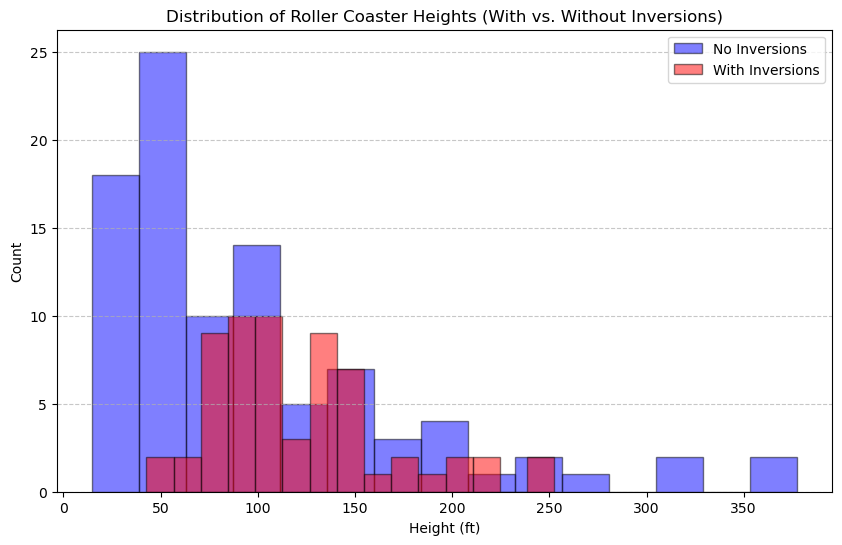

In [10]:
# Plotting the overlaid histograms
plt.figure(figsize=(10, 6))
plt.hist(no_inversions['height_ft'], bins=15, edgecolor='black', alpha=0.5, label='No Inversions', color='blue')
plt.hist(with_inversions['height_ft'], bins=15, edgecolor='black', alpha=0.5, label='With Inversions', color='red')

# Labels and title
plt.xlabel('Height (ft)')
plt.ylabel('Count')
plt.title('Distribution of Roller Coaster Heights (With vs. Without Inversions)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

print(f"The mean height of roller coasters without inversions is {round(np.mean(no_inversions['height_ft']),2)} feet.")
print(f"The mean height of roller coasters with inversions is {round(np.mean(with_inversions['height_ft']),2)} feet.")

Looking at height, both inverted roller coasters continue to have a right skewed distributions. Similar to speed, there is a much higher concentration at low heights with just a few outliers pulling the mean to the right. Inverted roller coasters have a roughly bimodal distribution, with peaks around 100 feet and 150 feet. The mean height of inverted roller coasters is slightly higher than the mean height of non-inverted roller coasters.

Next, we will determine the value of k we should use. We split our data into a training data set, a testing data set, and a validation set. This validation set will be applied to the training data set for different values of k to see which value of k has the highest classification accuracy. 

In [11]:

# Select features and target variable
X = clean_data[['height_ft', 'speed_mph']].values  # Features
y = clean_data['Inverted'].values  # Target (1 for Inverted, 0 for Not Inverted)

clean_data = clean_data.sample(frac=1, random_state=10).reset_index(drop=True)

# Split the data manually (70% train, 15% test, 15% validation)
train_split = int(0.7 * len(X))
test_split = train_split + int(0.15 * len(X))
X_train, X_test, X_validation = X[:train_split], X[train_split:test_split], X[test_split:]
y_train, y_test, y_validation = y[:train_split], y[train_split:test_split], y[test_split:]

Using our validation set, we will determine which value of k is optimal. 

In [15]:
k_values = range(1, 20)
validation_accuracies = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_validation)  # Predict on validation set
    val_acc = accuracy(y_validation, y_val_pred)  # Compare to validation labels 
    validation_accuracies.append(val_acc) # Keeping track of accuracy


# selecting best value of k
best_k = k_values[np.argmax(validation_accuracies)]
best_accuracy = max(validation_accuracies)
print(f'The best value of k is {best_k}')


The best value of k is 12


Now that we've found that it is optimal to use $k$ = 12 with our validation set, we will evaluate our model on training data set.

In [16]:
# Applying testing data with the selected k value
knn = KNN(k = best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy(y_test, y_pred)
print(f'The classification accuracy using Manhattan Distance is {round(100*acc,3)}%')

The classification accuracy using Manhattan Distance is 73.913%


This accuracy is ok as 74% is definitley better than guessing randomly. Let's build a confusion matrix to investigate the effectiveness of our kNN model further. 

A confusion matrix is a table that gives the false positive and false negative rates for a classification model. In this case, let a roller coaster with an inversion be a "positive" case while a roller coaster without an inversion is "negative". We have just been looking at accuracy, which looks at the total number of roller coasters that are correctly classified over the total number of roller coasters in the testing data set. 

![Confusion Matrix](https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress,format)

*Confusion matrix for binary classification (Credits: Encord)*

A confusion matrix also let's us calculate precision and recall: 

1. Precision measures the ratio of true positives to the ratio of predicted positives. So in this case, precision would be the percentage of roller coasters predicted to be inverted roller coasters.
2. Recall measures the ratio of true positives to the ratio of all positives. So in this case, recall would be the percetnage of all inverted roller coasters that were predicted to be inverted roller coasters.
3. The F-Score balances both precision and recall by giving the harmonic mean of the two quantities. 

Below, we define several functions that implements the parts of a confusion matrix. 

In [17]:
def true_positive(test, pred):
    # Inputs: test and predicted data, each vectors of 1's and 0's where 1 refers to positive case, 0 refers to negative case
    # Outputs: Number of true positives

    return sum((t == 1 and p == 1) for t, p in zip(test, pred)) # Calculataing True positive

def false_positive(test, pred):
    # Inputs: test and predicted data, each vectors of 1's and 0's where 1 refers to positive case, 0 refers to negative case
    # Outputs: Number of false positives

    return sum((t == 0 and p == 1) for t, p in zip(test, pred)) # Calculating false positives

def false_negative(test, pred):
    # Inputs: test and predicted data, each vectors of 1's and 0's where 1 refers to positive case, 0 refers to negative case
    # Outputs: Number of false negative

    return sum((t == 1 and p == 0) for t, p in zip(test, pred)) # Calculating false negative

def precision(test, pred):
    # Inputs: test and predicted data, each vectors of 1's and 0's where 1 refers to positive case, 0 refers to negative case
    # Output: Precision

    tp = true_positive(test, pred) # Calculating true positives
    fp = false_positive(test, pred) # Calculating false positives
    
    return tp / (tp + fp)

def recall(test, pred):
    # Inputs: test and predicted data, each vectors of 1's and 0's where 1 refers to positive case, 0 refers to negative case
    # Output: recall

    tp = true_positive(test, pred) # Calculating true positives
    fn = false_negative(test, pred) # Calculating false negatives
    
    return tp / (tp + fn)

def harmonic_mean(x,y):
    # Returns the harmonic mean of two values
    return 2/(1/x+1/y)


In [28]:
print(f'The precision using Euclidean Distance is {round(precision(y_test, y_pred),3)}')
print(f'The recall using Euclidean Distance is {round(recall(y_test, y_pred),3)}')
print(f'The F Score using Euclidean Distance is {round(harmonic_mean(recall(y_test, y_pred), precision(y_test, y_pred)),3)}')


The precision using Euclidean Distance is 0.667
The recall using Euclidean Distance is 0.667
The F Score using Euclidean Distance is 0.667


As we can see, precision and recall are both the same at 67%. This is a coincidence and usually the two quantities are not the same. The fact that precision and recall is less than accuracy may be because of imbalance in our data set, where we have more non-inverted roller coasters.

# III. Using Manhattan Distance

Now, let's repeat everything with Manhattan Distance to see if there an improvement. 

Manhattan Distance is defined by: 

$$
D_{\text{Manhattan}}(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^{n} |p_i - q_i|
$$


Manhattan distance can be a good measurement of distance with high-dimensional data and when outliers are present. This is because Euclidean distance penalizes outliers by having the squared term. In this case, the scatter plot illustrates that we do have some outliers in our data, so let's see if our results improve.

In [20]:
# Choosing the best value of k through validation

manhattan_validation_accuracies = []

for k in k_values:
    knn = KNN(k=k, distance_function = manhattan_distance) # Creating KNN object (using Manhattan Distance Instead)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_validation)  # Predict on validation set
    val_acc = accuracy(y_validation, y_val_pred)  # Compare to validation labels 
    manhattan_validation_accuracies.append(val_acc) # Keeping track of accuracy


# selecting best value of k
best_k_manhattan = k_values[np.argmax(manhattan_validation_accuracies)]
best_accuracy = max(manhattan_validation_accuracies)
print(f'The best value of k is {best_k_manhattan}')


The best value of k is 14


We see that the best value of $k$ to use based on our validation set is $k$ = 14. 

In [21]:
# Applying testing data with the selected k value
knn = KNN(k = best_k_manhattan)
knn.fit(X_train, y_train)
y_pred_manhattan = knn.predict(X_test)
acc_manhattan = accuracy(y_test, y_pred_manhattan)
print(f'The classification accuracy using Manhattan Distance is {round(100*acc_manhattan,3)}%')

The classification accuracy using Manhattan Distance is 78.261%


So our accuracy increases a bit. What about precision and recall?

In [23]:

print(f'The precision using Manhattan Distance is {precision(y_test, y_pred_manhattan)}.')
print(f'The recall using Manhattan Distance is {recall(y_test, y_pred_manhattan)}.')
print(f'The F Score using Manhattan Distance is {harmonic_mean(recall(y_test, y_pred_manhattan), precision(y_test, y_pred_manhattan))}.')

The precision using Manhattan Distance is 0.7.
The recall using Manhattan Distance is 0.7777777777777778.
The F Score using Manhattan Distance is 0.7368421052631579.


As we can see, both recall and precision have increased. The use of Manhattan distance has increased the distance from non-inverted roller coasters to inverted roller coasters, leading to these improvements. Ultimately, Manhattan distance led to higher quality results compared to Euclidean distance. This is likely due to the outliers in our data.